# Apartat (C): Analitzant Dades

In [144]:
import sklearn
import numpy as np
import matplotlib
import scipy
import pandas as pd
import scipy.stats
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy.stats import normaltest
%matplotlib notebook


# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset
# Carreguem dataset d'exemple
dataset = load_dataset('COMBO17.csv')
data = dataset.values

x = data[:, :2]
y = data[:, 2]

# Per veure les dimensionalitats
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X:", x.shape)
print("Dimensionalitat de l'atribut Y:", y.shape)

Dimensionalitat de la BBDD: (3462, 65)
Dimensionalitat de les entrades X: (3462, 2)
Dimensionalitat de l'atribut Y: (3462,)


In [145]:
# Per veure totes les columnes amb valors inexistents
x = dataset.isnull().sum()
null_columns = dataset.columns[dataset.isnull().any()]
print(null_columns)
print(dataset[null_columns].isnull().sum())
print("Total de valors no existents:",dataset.isnull().sum().sum())
# Tipus de cada atribut: 
print(dataset.dtypes)

Index(['VnMAG', 'e.VbMAG', 'S280MAG', 'e.S280MA'], dtype='object')
VnMAG        1
e.VbMAG      1
S280MAG     24
e.S280MA    24
dtype: int64
Total de valors no existents: 50
Nr           int64
Rmag       float64
e.Rmag     float64
ApDRmag    float64
mumax      float64
            ...   
e.VFD      float64
RFS        float64
e.RFS      float64
IFD        float64
e.IFD      float64
Length: 65, dtype: object


In [146]:
# Creamos una lista para seleccionar los nombres de columnas que queremos dropear
dataTypeDict = dict(dataset.dtypes)
lst = []
for x in dataTypeDict:
    lst.append(x)
    
# Drop de la columna 1 que contiene el indice 
dataset = dataset.drop(columns='Nr')

# Quitamos las columnas entre la 56 y la 65 al ser valores redundantes de las 13 anteriores
lst2 = lst[-10:]
# Eliminem valors inexistents
dataset = dataset.dropna()

# Drop de las columnas que den info acerca de los errores
for x in lst:
    if "e." in x:
        lst2.append(x)
dataset = dataset.drop(columns = lst2)
print("Total de valors no existents:", dataset.isnull().sum().sum())
    

Total de valors no existents: 0


In [147]:
# Apliquem el test de Shapiro per veure si es segueix una distribució Gaussiana
columns = dataset.columns
for column in columns:
    normal, value = (shapiro(dataset[column]))
    rounded_value = round(value, 5)
    if rounded_value > 0.05:
        print('Probably Gaussian')
    else:
        print("Probably not Gaussian")
# No tenim cap columna del dataset que seguieixi una distribució Gaussiana

Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian
Probably not Gaussian


<IPython.core.display.Javascript object>


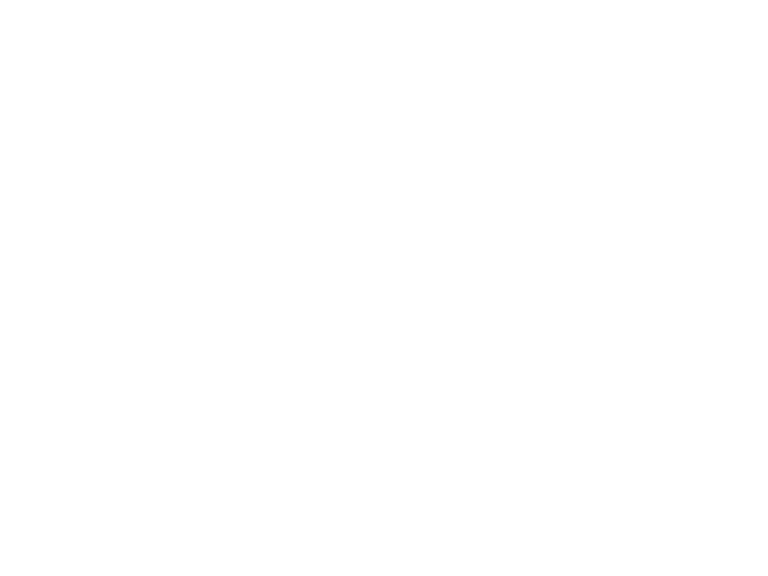

<IPython.core.display.Javascript object>


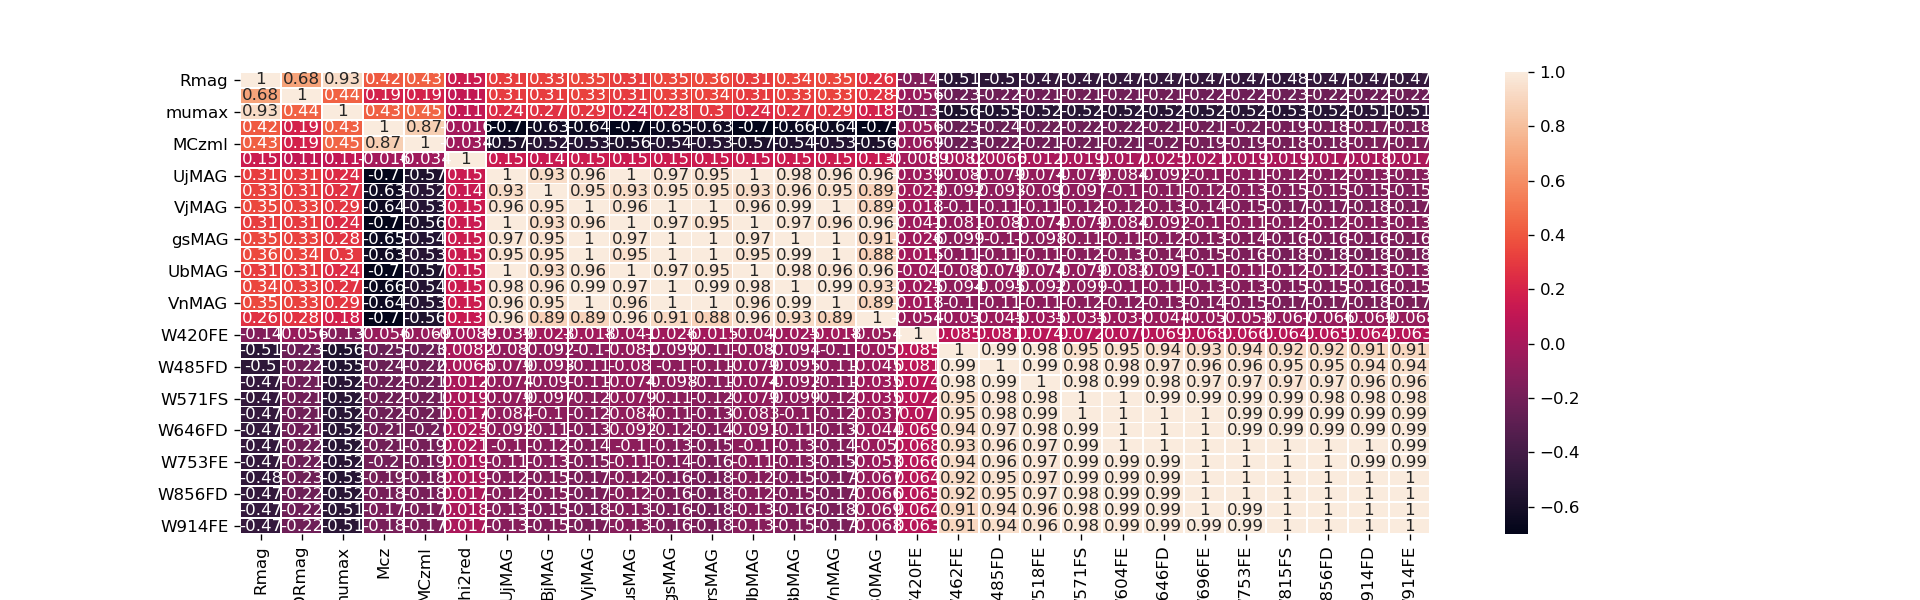

In [148]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()
plt.figure(figsize=(16, 5))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)